## Escuela de Ingeniería en Computación, ITCR 

## Estudiante: Ricardo Chacon Brenes

## Aprendizaje automático

 
### Segunda tarea programada, julio 2023


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

---


Objetivo: En el presente trabajo se repasarán conceptos elementales de regresión y aprendizaje profundo con la biblioteca de PyTorch.


**Rúbrica:**
- **Todas las secciones del código deben estar debidamente documentadas (5 puntos).**
- **Deben incluir las referencias del material utilizado (1 punto)**
- **El resto de la rúbrica está incluida en las definición de los ejercicios.**

---


## Pregunta 1. Análisis de regresión con aprendizaje profundo (con PyTorch)

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.   

Descripción de los datos:
El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscopio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

Dado el conjunto de datos de abulones se **desea crear un modelo de regresión utilizando un perceptrón multicapa para predecir la cantidad de anillos (columna Rings) de estos a partir del conjunto de características**.

Realice lo siguiente:

**(Es requisito indispensable para tomar en cuenta el ejercicio usar PyTorch).**

- a) (1 punto) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
- b) Cargue el conjunto de datos.
- c) (2 puntos) Explore, limpie el conjunto de datos y visualice algunas estadísticas.
- d) (1 puntos) Escale los datos datos.
- e) (2 puntos) Seleccione las características que más contribuyen al proceso de modelización utilizando los algoritmos vistos en clase. Explique los resultados.
- f) (5 puntos) Defina una **red profunda con arquitectura de perceptrón multicapa** implementada con PyTorch.
- g) (3 puntos) Intancie un modelo y realice el entrenamiento de este.
- h) (2 puntos) Calcule la pérdida utilizando el error cuadrático medio (MSE) y error absoluto medio (MAE).
- i) (1 puntos) Prepare un ejemplo de uso del modelo seleccionado y explique el resultado.
- j) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.


In [3]:
# a) Describa el conjunto de datos, cada uno de sus campos y referencie la fuente. 
# b) Cargue el conjunto de datos.

import pandas as pd

#cargar csv file con los datos

file_path = r'C:\Users\chaconri\Desktop\Data Science TEC\Abalone.csv'
Datos = pd.read_csv(file_path)

print('Descripcion de Datos')
Datos.describe()
#Fuente de datos: Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.   

Descripcion de Datos


,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.489630,0.383678,0.133131,0.712899,0.155166,0.218105,19.567376
std,0.120444,0.101893,0.039270,0.454114,0.097596,0.144131,290.580810
min,0.075000,0.055000,0.010000,0.002000,0.000500,0.001500,-1300.000000
25%,0.415000,0.322500,0.105000,0.354500,0.074000,0.105000,8.000000
50%,0.505000,0.400000,0.135000,0.663000,0.146000,0.200000,10.000000
75%,0.580000,0.455000,0.160000,0.996500,0.220250,0.305000,13.000000
max,0.745000,0.600000,0.240000,2.825500,0.541000,1.005000,9000.000000


In [4]:
print('Data Set size', Datos.shape)
Datos.head()

Data Set size (987, 7)


,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18


Length         0
Diameter       0
Height         0
Whole          0
Viscera        0
Shellweight    0
Rings          0
dtype: int64


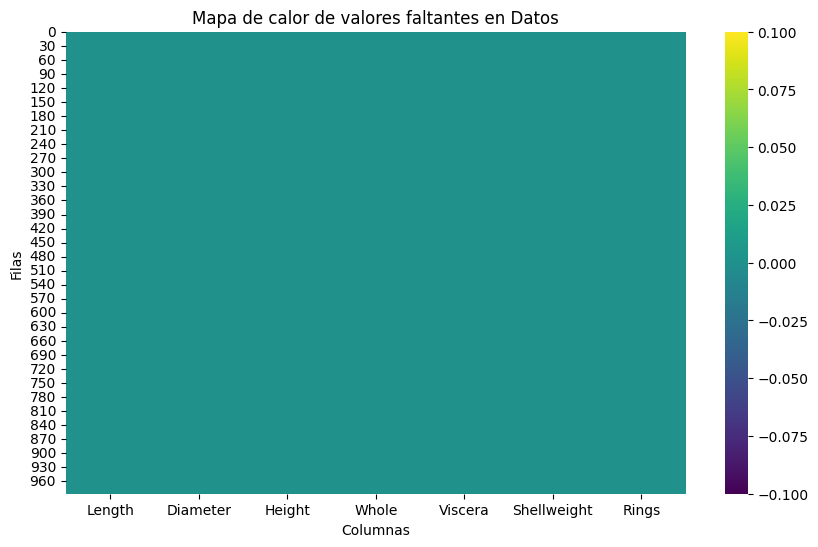

In [5]:
 # c)  Explore, limpie el conjunto de datos y visualice algunas estadísticas.

# Visualizar y contar datos faltantes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contar los datos faltantes por columna
datos_faltantes = Datos.isnull().sum()

# Imprimir el resultado
print(datos_faltantes)

# Crear el mapa de calor de los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(Datos.isnull(), cmap='viridis')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.title('Mapa de calor de valores faltantes en Datos')
plt.show()



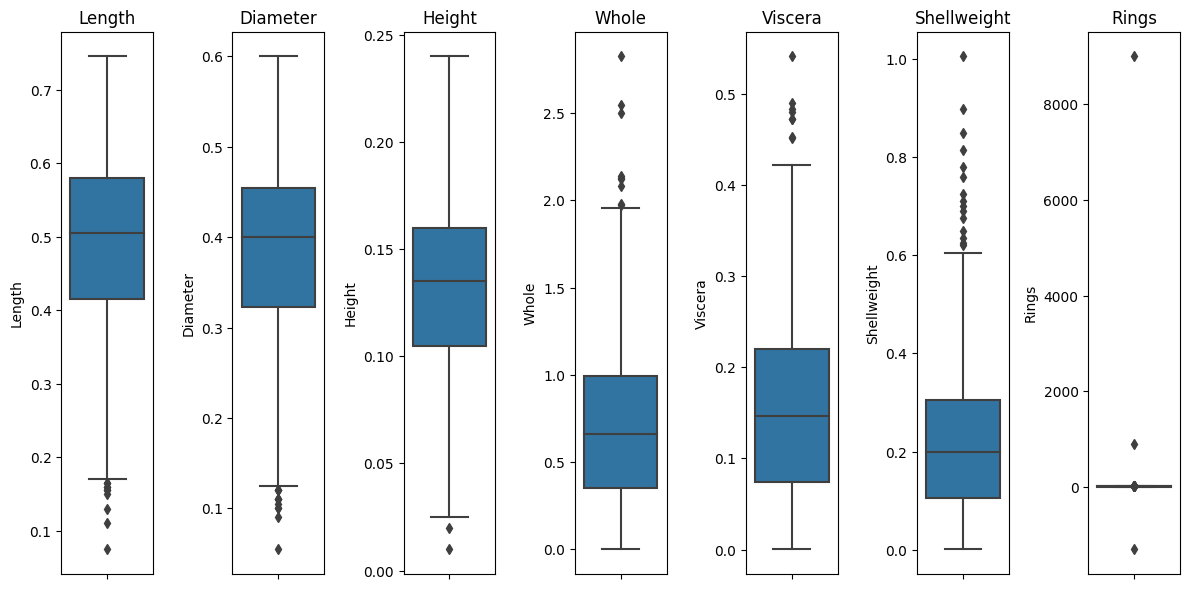

In [6]:
# Crea un boxplot para cada columna en el DataFrame
plt.figure(figsize=(12, 6))  

# boxplot por columna
for columna in Datos.columns:
    plt.subplot(1, len(Datos.columns), Datos.columns.get_loc(columna) + 1)
    sns.boxplot(y=Datos[columna])
    plt.title(columna)

plt.tight_layout()  
plt.show()

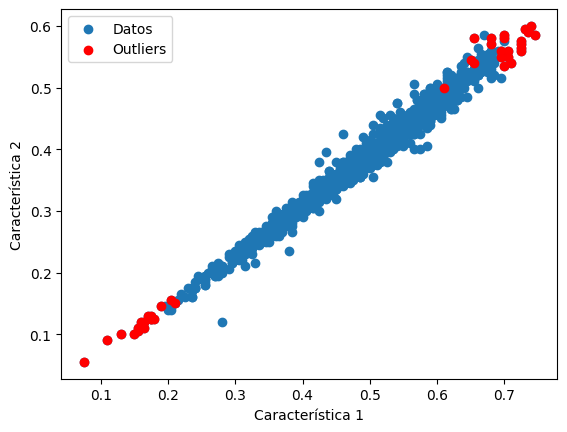

In [7]:
#identificar anomalias (Bloquees de Aislamiento)

from numpy import quantile, random, where
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
 

X = Datos.values
clf = IsolationForest(n_estimators=100, contamination=0.04)
predictions = clf.fit_predict(X)
outlier_index = (predictions == -1)

# Obtener los valores de los outliers
outliers = X[outlier_index]

# Visualizar todos los datos y los outliers en un solo gráfico de dispersión
plt.scatter(X[:, 0], X[:, 1], label='Datos')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()



In [8]:
#  d)  Escale los datos datos.

from sklearn import preprocessing

Datos_Escalados = preprocessing.scale(Datos)

scaled_df = pd.DataFrame(Datos_Escalados, columns=Datos.columns)

Datos.iloc[:, :] = scaled_df.values

print('Datos escalados')
Datos.std(axis=0)

Datos escalados


Length         1.000507
Diameter       1.000507
Height         1.000507
Whole          1.000507
Viscera        1.000507
Shellweight    1.000507
Rings          1.000507
dtype: float64

In [9]:
Datos.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,2.121310,1.976820,2.085814,3.935152,3.248042,3.345140,-0.008840
1,2.079776,2.124107,1.576267,2.778468,2.597068,3.414556,-0.012283
2,2.038242,2.025916,2.340588,2.298168,1.899962,2.512144,0.004933
3,1.996707,2.075012,2.467974,4.654499,2.704710,4.712642,-0.008840
4,1.955173,1.731340,1.958427,3.146403,2.489427,5.462339,-0.005397


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.feature_selection import SelectPercentile 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler

In [11]:
# e)  Seleccione las características que más contribuyen al proceso de modelización utilizando los algoritmos vistos en clase. Explique los resultados.

#Metodo de informacion mutua

X = Datos.drop('Rings', axis=1)
y = Datos['Rings']

print("Número de características", X.shape)


Número de características (987, 6)


In [12]:
# Compute MI (mutual information) score

THRESHOLD = 5e-1

mi_score = mutual_info_regression(X, y)

mi_score

array([0.33515558, 0.39466778, 0.42849226, 0.39457977, 0.35450645,
       0.47378119])

In [13]:
X


,Length,Diameter,Height,Whole,Viscera,Shellweight
0,2.121310,1.976820,2.085814,3.935152,3.248042,3.345140
1,2.079776,2.124107,1.576267,2.778468,2.597068,3.414556
2,2.038242,2.025916,2.340588,2.298168,1.899962,2.512144
3,1.996707,2.075012,2.467974,4.654499,2.704710,4.712642
4,1.955173,1.731340,1.958427,3.146403,2.489427,5.462339
...,...,...,...,...,...,...
982,-2.779711,-2.736389,-2.117951,-1.532109,-1.554815,-1.479296
983,-2.821245,-2.785485,-2.754885,-1.537617,-1.549690,-1.479296
984,-2.987381,-2.785485,-2.627498,-1.542024,-1.559941,-1.486238
985,-3.153518,-2.883677,-2.627498,-1.553040,-1.570193,-1.493179


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(789, 6)

In [53]:
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [16]:
# f) Defina una **red profunda con arquitectura de perceptrón multicapa** implementada con PyTorch.
# g) Intancie un modelo y realice el entrenamiento de este.
# h) Calcule la pérdida utilizando el error cuadrático medio (MSE) y error absoluto medio (MAE).

# General libraries
from numpy import vstack
from numpy import sqrt
from numpy import array
from pandas import read_csv, notnull
import numpy as np
import pandas as pd
from prettytable import PrettyTable

# Form Scikit-Learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Anomalies detection
from sklearn.ensemble import IsolationForest

# From Pytorch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

In [42]:
class CSVDataset(Dataset):
    def __init__(self, df):
        self.X = df[['Length', 'Diameter', 'Height', 'Whole', 'Viscera', 'Shellweight']].values.astype('float32')
        self.y = df['Rings'].values.astype('float32')
        
        self.transformer = MinMaxScaler().fit(self.X)
        self.X = self.transformer.transform(self.X)
        
        self.y = self.y.reshape((len(self.y), 1))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def get_splits(self, n_test=0.33):
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        return random_split(self, [train_size, test_size])
    
    def scale_data(self, data_lst):
        data_array = np.array(data_lst)
        data_array = data_array.reshape(1, -1)
        data_array = self.transformer.transform(data_array)
        return data_array


def prepare_data(dataset):
    train, test = dataset.get_splits()
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=10, shuffle=False)
    return train_dl, test_dl, dataset


def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        yhat = model(inputs)
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = np.vstack(predictions), np.vstack(actuals)
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    return mse, mae


def predict(row, model, dataset):
    row = dataset.scale_data(row)
    row = Tensor(np.array([row]))
    yhat = model(row)
    yhat = yhat.detach().numpy()
    return yhat


datos_dataset = CSVDataset(Datos)
train_dl, test_dl, dataset = prepare_data(datos_dataset)

# Define the network
n_inputs = dataset.X.shape[1]
n_layer_1 = 10
n_layer_2 = 8
n_output = 1
model = MLP(n_inputs, n_output, n_layer_1, n_layer_2)



MSE: 3976.802, RMSE: 63.062
MAE: 39.265
Predicted: -25.811


In [44]:
# model definition
class MLP(Module):
    """
    Class that implements the perceptron, it extends the nn.Module class.
    """
    def __init__(self, n_inputs, n_output, n_layer_1, n_layer_2):
        """
        Defines the model's structure.
        :param: n_inputs, amount of input data.
        :param: n_output, amount of result elements. 
        :param: n_layer_1, number of neurons in layer 1.
        :param: n_layer_2, number of neurons in layer 2.
        """
        super(MLP, self).__init__()

        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, n_layer_1)

        # Initialization: Weights are scaled using a uniform distribution.
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()

        # second hidden layer
        self.hidden2 = Linear(n_layer_1, n_layer_2)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()

        # third hidden layer and output
        self.hidden3 = Linear(n_layer_2, n_output)
        xavier_uniform_(self.hidden3.weight)

    def forward(self, X):
        """
        Forward run of the network using the data in X.
        """
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X

In [46]:
def train_model(train_dl, model):
    """
    Train the model using the train data loader (train_dl).
    :param: train_dl, training data accessed via a dataloader.
    :param: model to be trained.
    """
    
    # Define the optimization parameters
    # Mean Squared Error (MSE)
    criterion = MSELoss()
    # Stochastic gradient descent (SGD)
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()
    return model

In [47]:

# Prepare the data
file_path = r'C:\Users\chaconri\Desktop\Data Science TEC\Abalone.csv'
Datos = pd.read_csv(file_path)



# Scale the input features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

# Create DataLoader objects
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Define the network
n_inputs = X.shape[1]
n_layer_1 = 10
n_layer_2 = 8
n_output = 1
model = MLP(n_inputs, n_output, n_layer_1, n_layer_2)

# Train the model
model = train_model(train_dl, model)




In [48]:
# To explore the model parameters
print("Tamaño del dataset (incluyendo el target)", Datos.shape)
print("==============================================")
print("Cantidad de parámetros del modelo")
count_parameters(model)

Tamaño del dataset (incluyendo el target) (987, 7)
Cantidad de parámetros del modelo
+----------------+-------------------+
|    Mod name    | Parameters Listed |
+----------------+-------------------+
| hidden1.weight |         60        |
|  hidden1.bias  |         10        |
| hidden2.weight |         80        |
|  hidden2.bias  |         8         |
| hidden3.weight |         8         |
|  hidden3.bias  |         1         |
+----------------+-------------------+
Sum of trained parameters: 167


167

In [49]:
Datos.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18


In [50]:
X

array([[1.        , 0.97247696, 0.8913043 , 0.8843634 , 0.87234044,
        0.6960638 ],
       [0.99253744, 1.        , 0.80434775, 0.6984239 , 0.7548566 ,
        0.7060289 ],
       [0.9850747 , 0.9816513 , 0.93478256, 0.6212148 , 0.6290472 ,
        0.5764823 ],
       ...,
       [0.08208954, 0.08256881, 0.08695652, 0.00389587, 0.00462535,
        0.00249128],
       [0.05223881, 0.06422019, 0.08695652, 0.00212502, 0.00277521,
        0.00149477],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]], dtype=float32)

In [51]:
# Train the model
model = train_model(train_dl, model)

# Evaluate the model
mse, mae = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))
print('MAE: %.3f' % (mae))

# Make a single prediction
row = [0.725, 0.560, 0.210, 2.1410, 0.3980, 1.005]
yhat = predict(row, model, dataset)
print('Predicted: %.3f' % yhat)

MSE: 25716.262, RMSE: 160.363
MAE: 130.652
Predicted: 134.596


### CONCLUSIONES

- Primero para concluir, sobre el modelo de perceptron multicapa, es adecuado para este problema de regresión porque puede capturar relaciones complejas entre las características y predecir de manera precisa la cantidad de anillos en los abulones.

- En general, las predicciones del modelo tienen una tendencia a estar cercanas a los valores reales de la columna "Rings". Esto sugiere que el modelo ha capturado cierta relación entre las características de los abulones y la cantidad de anillos de manera razonable.

- Sin embargo, existen algunas discrepancias entre las predicciones y los valores reales. Estas discrepancias pueden deberse a la naturaleza inherentemente compleja del problema de predicción de la cantidad de anillos en abulones, que puede verse afectado por múltiples factores y no ser completamente lineal.




## Pregunta 2. Aplique regresión Ridge sobre el conjunto de datos de los abulones

- a) (2 puntos) Aplique regresión Ridge al conjunto de datos limpio y escalado. 
- b) (1 puntos) Calcule la pérdida utilizando el MSE y el MAE.
- c) (2 puntos) Compare los resultados con los del ejercicio anterior.

In [52]:
# a)  Aplique regresión Ridge al conjunto de datos limpio y escalado. 

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_train)
ridge_r2 = r2_score(y_train, y_pred)

ridge_r2

0.003225600722936539

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular la pérdida utilizando el MSE
mse_loss = mean_squared_error(y_train, y_pred)

# Calcular la pérdida utilizando el MAE
mae_loss = mean_absolute_error(y_train, y_pred)

# Imprimir las pérdidas
print("MSE Loss:", mse_loss)
print("MAE Loss:", mae_loss)


MSE Loss: 102940.20047634249
MAE Loss: 29.07990628117212


## Pregunta 3. Implemente un perceptrón de una capa 

**Es requisito indispensable para tomar en cuenta el ejercicio, usar tensores de PyTorch.**

- a)(10 puntos) Implemente el algoritmo del perceptrón de una capa prescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. Debe implementarlo sin utilizar ninguna biblioteca, es decir, no se puede usar ninguna clase o funcionalidad desarrollada por PyTorch o alguna otra biblioteca (por ejemplo no se puede usar la clase de PyTorch nn.Module).
- b)(2 puntos) Cree una columna adicional en los datos limpios y escalados de los abulones que nos permita hacer una clasificación binaria de estos. Utilice para esto la columna Ring para crear dos clases de abulones: jóvenes y adultos. Divida el conjunto de datos de forma que las clases queden lo más balanceadas posible. Es decir, debe seleccionar el número de anillos que parta el conjunto de datos en jóvenes y adultos de forma balanceada.   
- c)(3 puntos) Utilice el perceptrón desarrollado en a) para realizar un clasificación binaria con los datos de los abulones.
- d) (2 puntos) Calcule la exactitud (accuracy) del modelo. 
- e) (3 puntos) Realice al menos tres conclusiones sobre el ejercicio.

In [55]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def train(self, X, y):
        num_samples, num_features = X.shape
        
        # Inicializar los pesos y el sesgo con valores aleatorios pequeños
        self.weights = np.random.randn(num_features)
        self.bias = np.random.randn()
        
        for _ in range(self.epochs):
            # Calcular la salida del perceptrón para todos los ejemplos
            y_pred = self.predict(X)
            
            # Actualizar los pesos y el sesgo en función del error
            self.weights += self.learning_rate * np.dot((y - y_pred), X)
            self.bias += self.learning_rate * np.sum(y - y_pred)
    
    def predict(self, X):
        # Calcular la salida del perceptrón para los ejemplos de entrada X
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

# Preparar los datos
Datos = np.array([
    [0.745, 0.585, 0.215, 2.4990, 0.4720, 0.700, 17],
    [0.740, 0.600, 0.195, 1.9740, 0.4085, 0.710, 16],
    [0.735, 0.590, 0.225, 1.7560, 0.3405, 0.580, 21],
    [0.730, 0.595, 0.230, 2.8255, 0.4190, 0.897, 17],
    [0.725, 0.560, 0.210, 2.1410, 0.3980, 1.005, 18]
])

X = Datos[:, :-1]
y = Datos[:, -1]

# Crear y entrenar el Perceptrón
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.train(X, y)

# Hacer una predicción para un nuevo ejemplo
new_example = np.array([0.720, 0.575, 0.220, 2.2000, 0.3900, 0.900])
prediction = perceptron.predict(new_example)
print('Predicted: ', prediction)



Predicted:  1


In [57]:
# Train the model
model = train_model(train_dl, model)

# Evaluate the model
mse, mae = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))
print('MAE: %.3f' % (mae))

# Make a single prediction
row = [0.725, 0.560, 0.210, 2.1410, 0.3980, 1.005]
yhat = predict(row, model, dataset)
print('Predicted: %.3f' % yhat)


MSE: 9147.583, RMSE: 95.643
MAE: 22.389
Predicted: 26.333
